# Time series


## importing libraries numpy and pandas 
## import data file in xle

> 1.preparing data and data cleaning plus seperation and grouping

> 2 .check if our data is well disturbuted and homogenious 

> 3.check for trend and seasonaliity and in genereal statioarity by sequentioal mann kandle , decomposition

> 4.give data to holt winter for prediction and transform to stationary for some othr models

وارد کردن کتابخانه های لازم

In [1]:
# ! pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose , STL
from pandas_jalali.converter import get_gregorian_date_from_jalali_date

% matplotlib inline
# وارد کردن داده ها

UsageError: Line magic function `%` not found.


In [3]:
df=pd.read_excel(r'data weather.xlsx')

In [4]:
df.head(20)

,station,sal,mah,roz,t min,t max
0,شکوهیه,1370,1,1,6.5,20.0
1,شکوهیه,1370,1,2,7.0,21.0
2,شکوهیه,1370,1,3,12.0,20.0
3,شکوهیه,1370,1,4,10.0,22.5
4,شکوهیه,1370,1,5,7.2,12.4
5,شکوهیه,1370,1,6,5.2,16.8
6,شکوهیه,1370,1,7,7.0,19.0
7,شکوهیه,1370,1,8,7.0,23.0
8,شکوهیه,1370,1,9,7.4,24.0
9,شکوهیه,1370,1,10,10.0,23.7


In [4]:
#Data preparation to see if we have missing data also check the size
# df['roz']=df['roz']..days
df.dtypes,df.shape

(station     object
 sal          int64
 mah          int64
 roz          int64
 t min      float64
 t max      float64
 dtype: object,
 (11204, 6))

In [5]:
# there is no empty rows
df.isnull().sum(),df.isnull().any()


(station    0
 sal        0
 mah        0
 roz        0
 t min      0
 t max      0
 dtype: int64,
 station    False
 sal        False
 mah        False
 roz        False
 t min      False
 t max      False
 dtype: bool)

In [5]:
df.rename(columns={'sal':'year','mah':'month','roz':'day','t min':'t_min','t max':'t_max'},inplace=True)
df['station']=str('Shokohie')
# df["Date"]=df['sal'].astype(str) + '-' +df['mah'].astype(str) + '-' +df['roz'].astype(str) 
df['year'], df['month'], df['day'] = get_gregorian_date_from_jalali_date(df['year'], df['month'], df['day'])
df['t_ave']=(df['t_min']+df['t_max'])/2

df.head(20)


,station,year,month,day,t_min,t_max,t_ave
0,Shokohie,1991.0,3.0,21.0,6.5,20.0,13.25
1,Shokohie,1991.0,3.0,22.0,7.0,21.0,14.00
2,Shokohie,1991.0,3.0,23.0,12.0,20.0,16.00
3,Shokohie,1991.0,3.0,24.0,10.0,22.5,16.25
4,Shokohie,1991.0,3.0,25.0,7.2,12.4,9.80
5,Shokohie,1991.0,3.0,26.0,5.2,16.8,11.00
6,Shokohie,1991.0,3.0,27.0,7.0,19.0,13.00
7,Shokohie,1991.0,3.0,28.0,7.0,23.0,15.00
8,Shokohie,1991.0,3.0,29.0,7.4,24.0,15.70
9,Shokohie,1991.0,3.0,30.0,10.0,23.7,16.85


In [6]:
# make our date as index and i cant give pandas series in function input like int()

df ['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

df.set_index('Date',inplace=True)# inplace no copy

df

,station,year,month,day,t_min,t_max,t_ave
Date,,,,,,,
1991-03-21,Shokohie,1991.0,3.0,21.0,6.5,20.0,13.25
1991-03-22,Shokohie,1991.0,3.0,22.0,7.0,21.0,14.00
1991-03-23,Shokohie,1991.0,3.0,23.0,12.0,20.0,16.00
1991-03-24,Shokohie,1991.0,3.0,24.0,10.0,22.5,16.25
1991-03-25,Shokohie,1991.0,3.0,25.0,7.2,12.4,9.80
...,...,...,...,...,...,...,...
2022-03-16,Shokohie,2022.0,3.0,16.0,7.8,21.7,14.75
2022-03-17,Shokohie,2022.0,3.0,17.0,2.6,14.5,8.55
2022-03-18,Shokohie,2022.0,3.0,18.0,-1.7,16.2,7.25


<AxesSubplot:title={'center':'mean temp of years'}, xlabel='Date', ylabel='temp'>

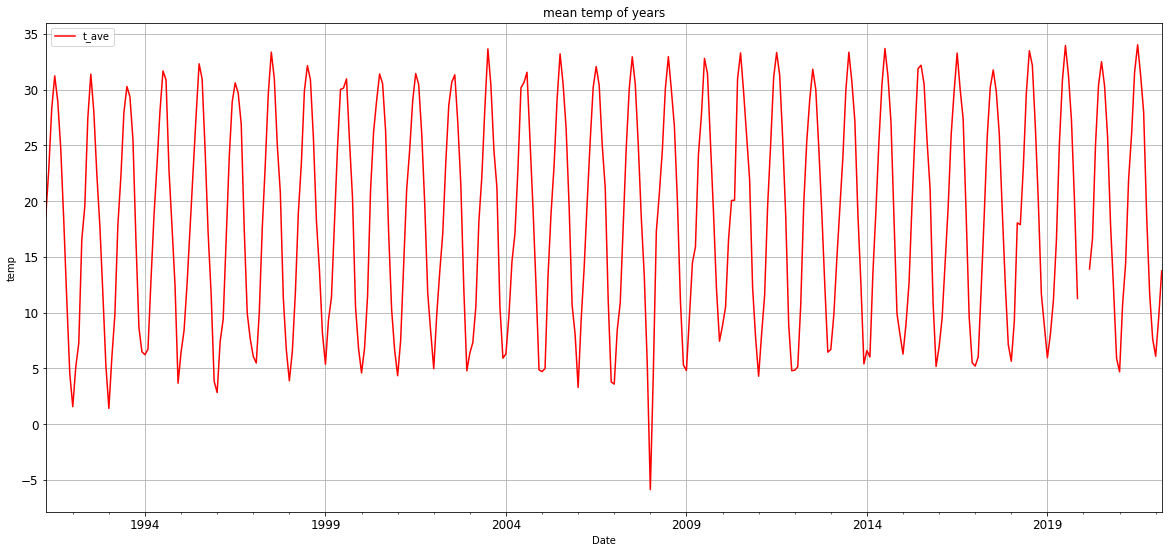

In [7]:
df=df['1991-04':].resample('M').mean()
df['t_ave'].plot(figsize=(20,9),grid=True,c='red',ylabel='temp',fontsize='large',legend='temp',title='mean temp of years')

In [8]:
df['season']=pd.cut(df['month'],bins=4,labels=('wi',"sp",'su','fa'))
# for i in range(5,13):
#     x=str(i)+'.xlsx'
#     df[df['month']==i].t_ave.to_excel(x)
# df[df['t_min']<=0 ][df['month']==12].to_excel('1212.xlsx')
df.head(20)

,year,month,day,t_min,t_max,t_ave,season
Date,,,,,,,
1991-04-30,1991.0,4.0,15.500000,10.236667,26.906667,18.571667,sp
1991-05-31,1991.0,5.0,16.000000,14.367742,31.087097,22.727419,sp
1991-06-30,1991.0,6.0,15.500000,19.373333,37.150000,28.261667,sp
1991-07-31,1991.0,7.0,16.000000,22.387097,40.074194,31.230645,su
1991-08-31,1991.0,8.0,16.000000,18.880645,39.064516,28.972581,su
1991-09-30,1991.0,9.0,15.500000,14.803333,34.623333,24.713333,su
1991-10-31,1991.0,10.0,16.000000,9.854839,26.751613,18.303226,fa
1991-11-30,1991.0,11.0,15.500000,2.830000,19.533333,11.181667,fa
1991-12-31,1991.0,12.0,16.000000,-1.532258,10.645161,4.556452,fa


<AxesSubplot:xlabel='year'>

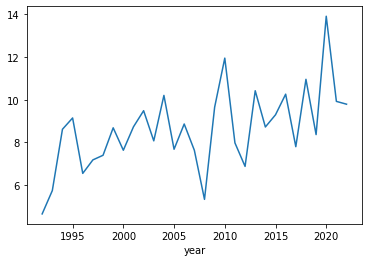

In [10]:
df[df['season']=='wi'].groupby('year').mean().t_ave.plot()

<AxesSubplot:xlabel='Date'>

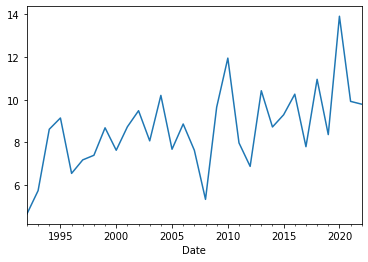

In [11]:
df[df['season']=='wi'].resample('A').mean().t_ave.plot()

<AxesSubplot:xlabel='Date'>

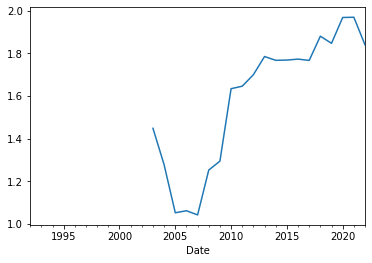

In [17]:
# moving average which replace 12th element with 12 previos data row mean and also std which is squar root of variance
df[df['season']=='wi'].resample('A').mean().rolling(12).std().t_ave.plot()

In [18]:
#dyes that we do not have data
daterang=pd.date_range(start='1992-01-01',end='2022-02-01',freq='D')
daterang.difference(df.index)


DatetimeIndex(['1992-01-01', '1992-01-02', '1992-01-03', '1992-01-04',
               '1992-01-05', '1992-01-06', '1992-01-07', '1992-01-08',
               '1992-01-09', '1992-01-10',
               ...
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-02-01'],
              dtype='datetime64[ns]', length=10629, freq=None)

In [19]:
#making a 30 years period cut of our data set
# group the average by seasons
# latest_df[['month','t_ave']].groupby (['month']).mean().sort_values('t_ave')
latest_df=df.loc['1992':'2021']
latest_df.reset_index()
latest_df.head()

,year,month,day,t_min,t_max,t_ave,season
Date,,,,,,,
1992-01-31,1992.0,1.0,16.000000,-4.074194,7.187097,1.556452,wi
1992-02-29,1992.0,2.0,15.000000,-1.765517,12.006897,5.120690,wi
1992-03-31,1992.0,3.0,16.032258,0.912903,13.625806,7.269355,wi
1992-04-30,1992.0,4.0,15.500000,9.340000,23.703333,16.521667,sp
1992-05-31,1992.0,5.0,16.000000,13.029032,26.035484,19.532258,sp


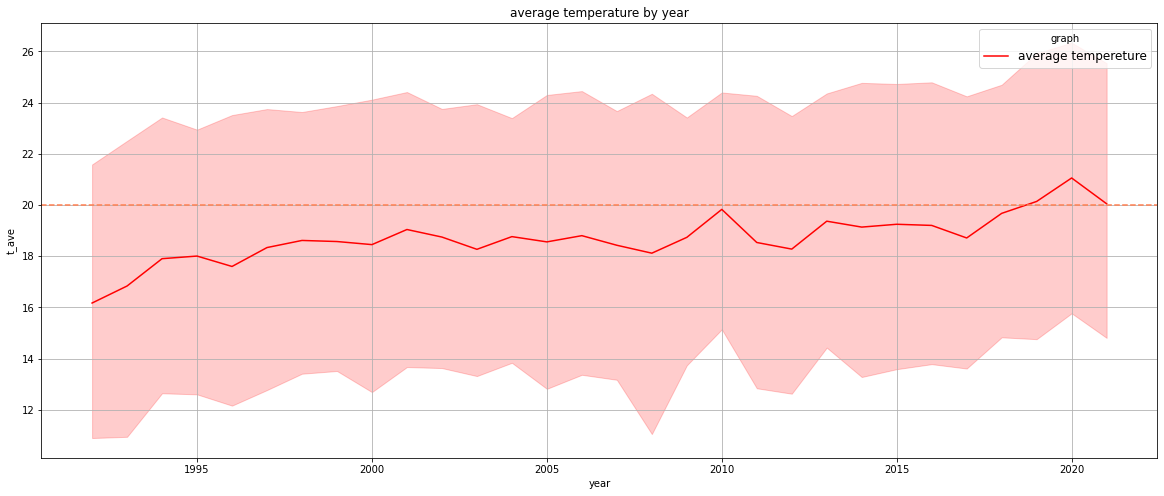

In [20]:


plt.figure(figsize=(20,8))
sns.set_palette("PuBuGn_d")
palette = sns.color_palette("mako_r", 6)
sns.lineplot(x=latest_df['year'],y=latest_df['t_ave'],color='red' ,palette=palette)
# anu_df['t_ave'].plot(figsize=(20,8))
plt.title('average temperature by year')
plt.grid(True)
plt.axhline(20,c='coral',ls='--')
plt.legend(labels=["average tempereture"],title = "graph",fontsize = 'large', title_fontsize = "10")
plt.show()

In [17]:
#see duplicated inex can be .reset_index()
df[df.index.duplicated()],df.info

(Empty DataFrame
 Columns: [year, month, day, t_min, t_max, t_ave, season]
 Index: [],
 <bound method DataFrame.info of               year  month   day      t_min      t_max      t_ave season
 Date                                                                   
 1991-04-30  1991.0    4.0  15.5  10.236667  26.906667  18.571667     sp
 1991-05-31  1991.0    5.0  16.0  14.367742  31.087097  22.727419     sp
 1991-06-30  1991.0    6.0  15.5  19.373333  37.150000  28.261667     sp
 1991-07-31  1991.0    7.0  16.0  22.387097  40.074194  31.230645     su
 1991-08-31  1991.0    8.0  16.0  18.880645  39.064516  28.972581     su
 ...            ...    ...   ...        ...        ...        ...    ...
 2021-11-30  2021.0   11.0  15.5   5.376667  17.963333  11.670000     fa
 2021-12-31  2021.0   12.0  16.0   0.825806  14.422581   7.624194     fa
 2022-01-31  2022.0    1.0  16.0  -0.432258  12.596774   6.082258     wi
 2022-02-28  2022.0    2.0  14.5   2.692857  16.392857   9.542857     wi
 2022

# P_VALUE

In [21]:
# stationarry dicky fuller tedt
from statsmodels.tsa.stattools import adfuller

print('dickyyyyyyyyyyyy test result ************spring***********')
test_df=adfuller(df[df['season']=='sp'].resample('A').mean().t_ave,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['test statistic','p_value','Lag Used', 'Number of Observations Used'])
for key , value in test_df[4].items():
    df_output['critical values (%s)'%key]=value
df_output

dickyyyyyyyyyyyy test result ************spring***********


test statistic                 -2.691572
p_value                         0.075508
Lag Used                        0.000000
Number of Observations Used    30.000000
critical values (1%)           -3.669920
critical values (5%)           -2.964071
critical values (10%)          -2.621171
dtype: float64

dickyyyyyyyyyyyy test result ************winter***********


test statistic                 -4.941727
p_value                         0.000029
Lag Used                        0.000000
Number of Observations Used    30.000000
critical values (1%)           -3.669920
critical values (5%)           -2.964071
critical values (10%)          -2.621171
dtype: float64

dickyyyyyyyyyyyy test result ************fall***********


test statistic                 -4.401593
p_value                         0.000295
Lag Used                        0.000000
Number of Observations Used    30.000000
critical values (1%)           -3.669920
critical values (5%)           -2.964071
critical values (10%)          -2.621171
dtype: float64

In [24]:
print('dickyyyyyyyyyyyy test result ************summer***********')
test_df=adfuller(df[df['season']=='su'].resample('A').mean().t_ave,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['test statistic','p_value','Lag Used', 'Number of Observations Used'])
for key , value in test_df[4].items():
    df_output['critical values (%s)'%key]=value
df_output

dickyyyyyyyyyyyy test result ************summer***********


test statistic                 -0.216898
p_value                         0.936477
Lag Used                        6.000000
Number of Observations Used    24.000000
critical values (1%)           -3.737709
critical values (5%)           -2.992216
critical values (10%)          -2.635747
dtype: float64

# Standard Normal Homogeneity Test
Robust and non-robust SNHT tests for changepoint
detection.
This function performs a standard normal homogeneity test on the data supplied. This test searches the data for potential changepoints.
>
آشکارسازی نوسانات اقلیمی با استفاده از روش آزمون همگنی نرمال استاندارد      

In [68]:
# Standard Normal Homogeneity Test (SNHT)




def SNHT_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    inputdata_mean = np.mean(inputdata)
    n  = inputdata.shape[0]
    k = range(1,n)
    sigma = np.sqrt(np.sum((inputdata-np.mean(inputdata))**2)/(n-1))
    Tk = [x*(np.sum((inputdata[0:x]-inputdata_mean)/sigma)/x)**2 + (n-x)*(np.sum((inputdata[x:n]-inputdata_mean)/sigma)/(n-x))**2 for x in k]
    T = np.max(Tk)
    K = list(Tk).index(T) + 1
    return K

def snht(j):
    lis=[]
    for i in range(1992,2022):
        lis.append(SNHT_change_point_detection(latest_df[latest_df['month']==j][str(i)].t_ave.dropna()))
    return lis

    
                  

C:\Users\Acer\AppData\Local\Temp/ipykernel_1196/3472427080.py:20: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  lis.append(SNHT_change_point_detection(latest_df[latest_df['month']==j][str(i)].t_ave.dropna()))


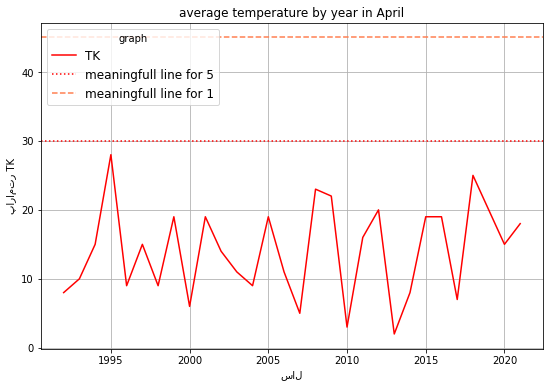

In [94]:
plt.figure(figsize=(9,6))
plt.ylabel('پارامتر TK')
plt.xlabel('سال')
plt.title('average temperature by year in April')
plt.grid(True)
# xx=snht(4)
plt.plot(range(1992,2022), snht(4), label='TK',color = 'red')





plt.axhline(30 ,c='r',ls=':',label='meaningfull line for 5')
plt.axhline(45,c='coral',ls='--',label='meaningfull line for 1')

plt.legend(title = "graph",fontsize = 'large', title_fontsize = "10",loc = 2)

plt.show()

C:\Users\Acer\AppData\Local\Temp/ipykernel_1196/3472427080.py:20: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  lis.append(SNHT_change_point_detection(latest_df[latest_df['month']==j][str(i)].t_ave.dropna()))


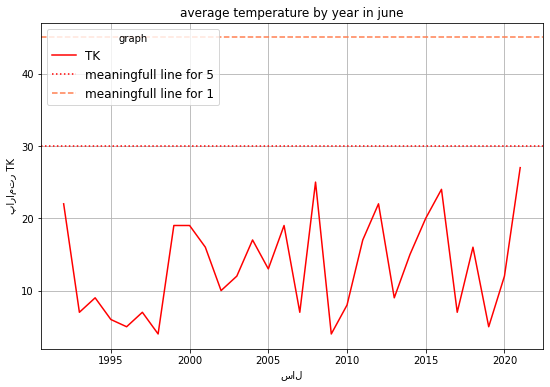

In [93]:
plt.figure(figsize=(9,6))
plt.ylabel('پارامتر TK')
plt.xlabel('سال')
plt.title('average temperature by year in june')
plt.grid(True)
# xx=snht(4)
plt.plot(range(1992,2022), snht(6), label='TK',color = 'red')





plt.axhline(30 ,c='r',ls=':',label='meaningfull line for 5')
plt.axhline(45,c='coral',ls='--',label='meaningfull line for 1')

plt.legend(title = "graph",fontsize = 'large', title_fontsize = "10",loc = 2)

plt.show()

# Mann Kandall stat test SQMK

# in this part for graphs we used R language

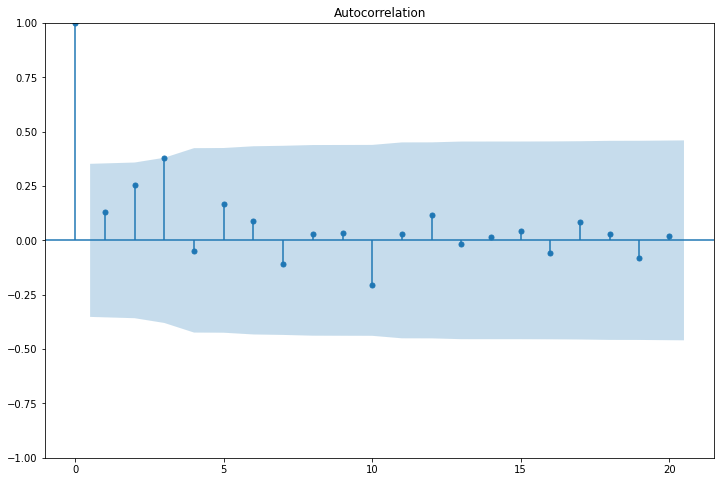

Mann_Kendall_Test(trend='increasing', h=True, p=1.843097094700319e-05, z=4.283097075539829, Tau=0.5440860215053763, s=253.0, var_s=3461.6666666666665, slope=0.07137694145758644, intercept=28.472356630824375)


In [165]:
import pymannkendall as mk
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(df[df['month']==9].t_ave, lags=20, ax=ax)
plt.show()

print(mk.original_test(df[df['season']=='su'].resample('A').mean().t_ave, alpha=0.05))

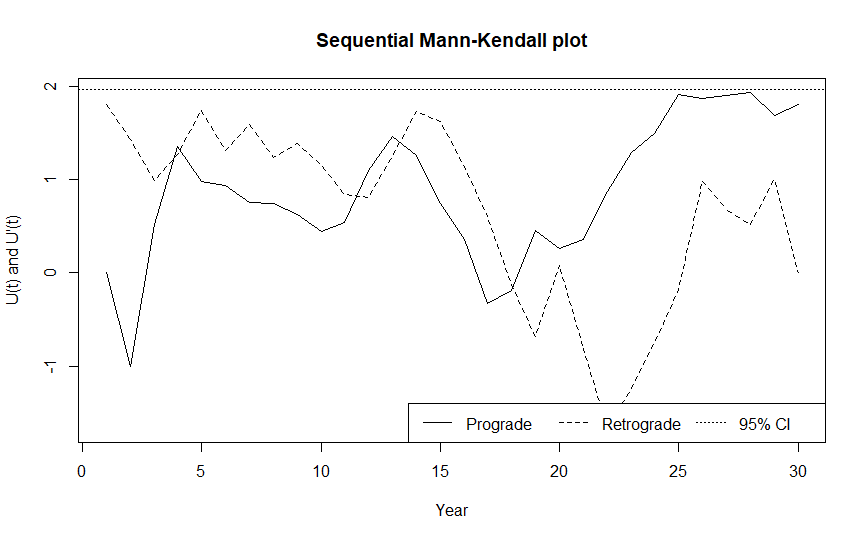

In [168]:
import glob
from IPython.display import Image, display

for imageName in glob.glob(r'C:\Users\Acer\Desktop\sqmk\*.png'): #assuming JPG
    display(Image(filename=imageName))
    break


# trend analysis_ linear regressin with least squar 
# qq grapg residual graph
spring winter fall s
ummer

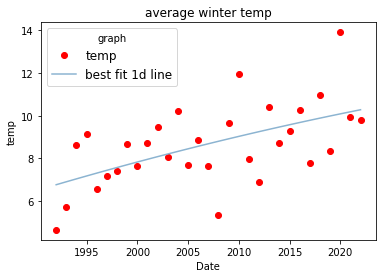

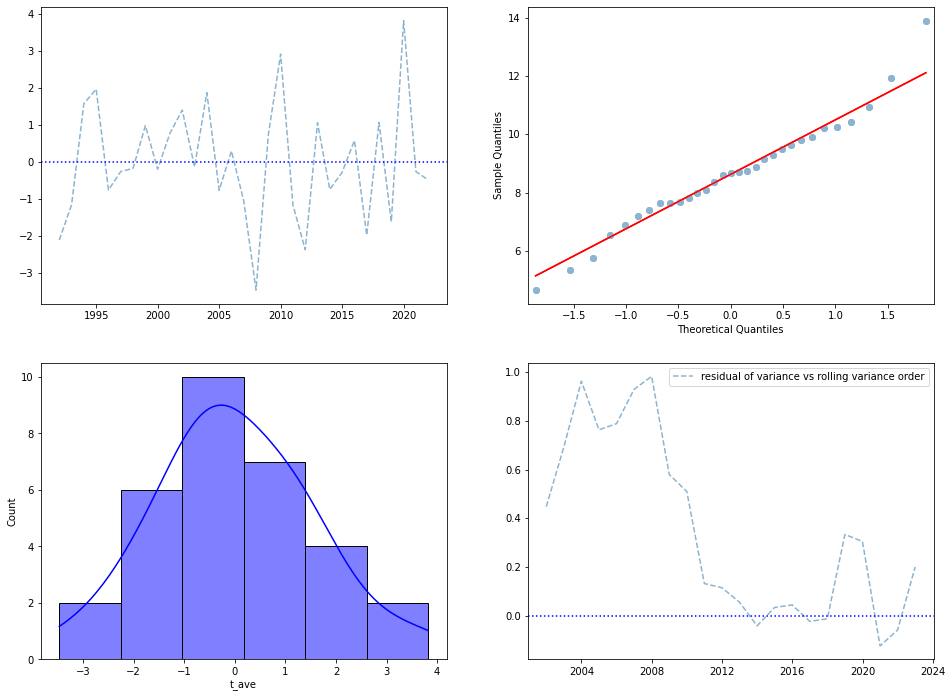

In [44]:
datafarme=df[df['season']=='wi'].resample('A').mean().t_ave
datayear=df[df['season']=='wi'].resample('A').mean().year
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 2)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
# plt.grid(True)
plt.figure(figsize=(6,4))
plt.plot(datayear,datafarme,'ro',label='temp')
plt.plot(datayear,y_hat,label='best fit 1d line')
plt.title('average winter temp')
plt.ylabel('temp')
plt.xlabel('Date')
plt.legend(title = "graph",fontsize = 'large', title_fontsize = "10",loc = 2)
plt.show()
# sns.distplot(datafarme)
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import statsmodels.graphics.gofplots as sm
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(datafarme-y_hat,kde=True, color ='blue',ax=ax[1,0],label='residual dist histogram')
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1]);
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1])

ax[0,0].plot(datayear,datafarme-y_hat,ls='--',label='residual of first order')
ax[0,0].axhline(0 ,c='b',ls=':')
ax[1,1].plot((datafarme.std()-datafarme.rolling(10).std()).dropna(),ls='--',label='residual of variance vs rolling variance order')
ax[1,1].axhline(0 ,c='b',ls=':')
plt.legend()

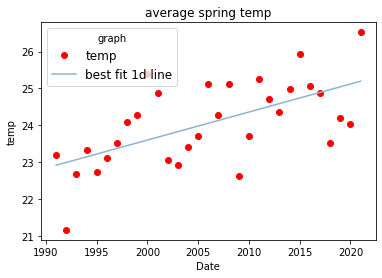

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


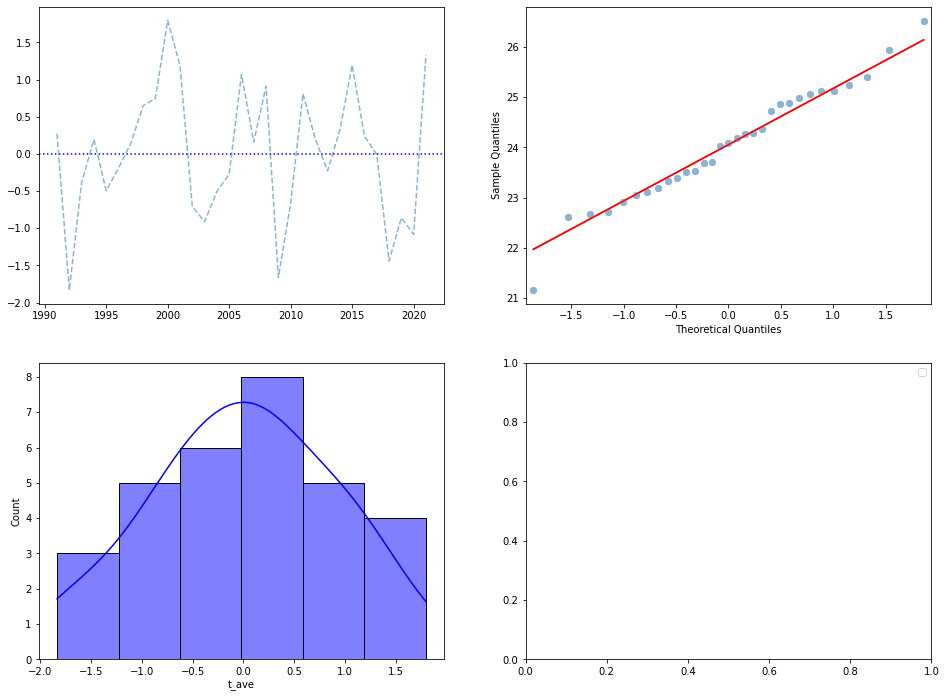

In [101]:
datafarme=df[df['season']=='sp'].resample('A').mean().t_ave
datayear=df[df['season']=='sp'].resample('A').mean().year
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
# plt.grid(True)
plt.figure(figsize=(6,4))
plt.plot(datayear,datafarme,'ro',label='temp')
plt.plot(datayear,y_hat,label='best fit 1d line')
plt.title('average spring temp')
plt.ylabel('temp')
plt.xlabel('Date')
plt.legend(title = "graph",fontsize = 'large', title_fontsize = "10",loc = 2)
plt.show()
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(datafarme-y_hat,kde=True, color ='blue',ax=ax[1,0],label='residual dist histogram')
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1]);
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1])

ax[0,0].plot(datayear,datafarme-y_hat,ls='--',label='residual of first order')
ax[0,0].axhline(0 ,c='b',ls=':')

plt.legend()

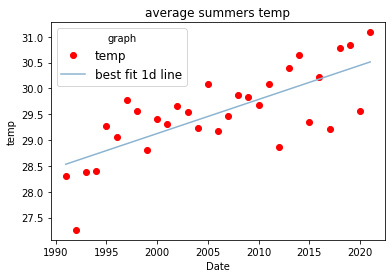

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


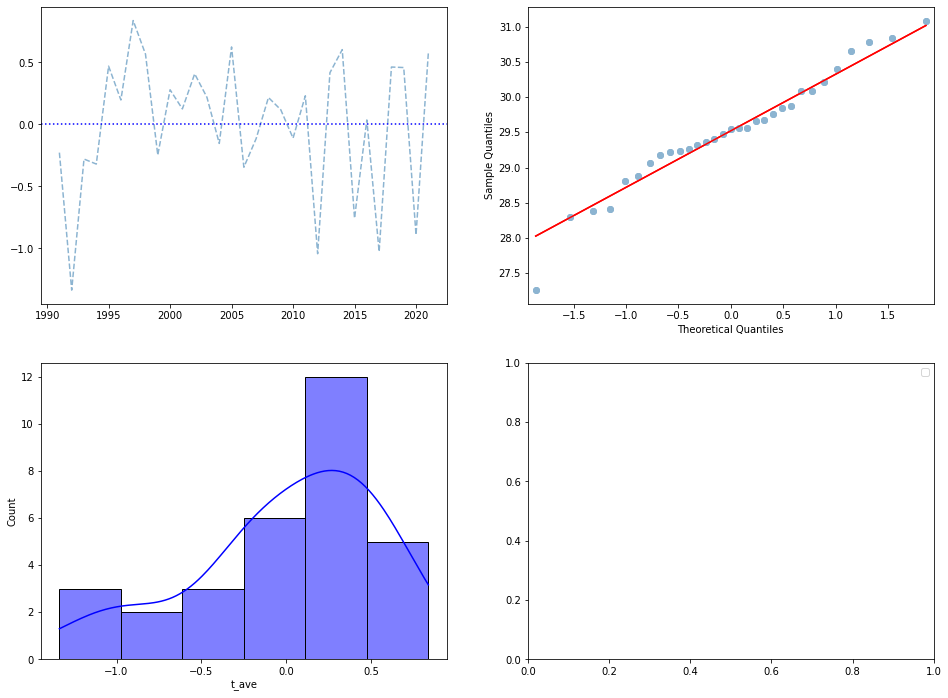

In [102]:
datafarme=df[df['season']=='su'].resample('A').mean().t_ave
datayear=df[df['season']=='su'].resample('A').mean().year
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
# plt.grid(True)
plt.figure(figsize=(6,4))
plt.plot(datayear,datafarme,'ro',label='temp')
plt.plot(datayear,y_hat,label='best fit 1d line')
plt.title('average summers temp')
plt.ylabel('temp')
plt.xlabel('Date')
plt.legend(title = "graph",fontsize = 'large', title_fontsize = "10",loc = 2)
plt.show()
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(datafarme-y_hat,kde=True, color ='blue',ax=ax[1,0],label='residual dist histogram')
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1]);
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1])

ax[0,0].plot(datayear,datafarme-y_hat,ls='--',label='residual of first order')
ax[0,0].axhline(0 ,c='b',ls=':')

plt.legend()

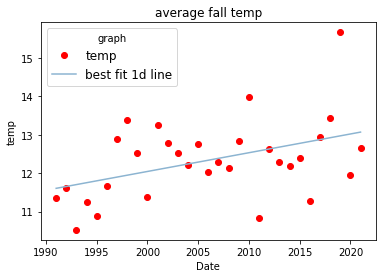

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


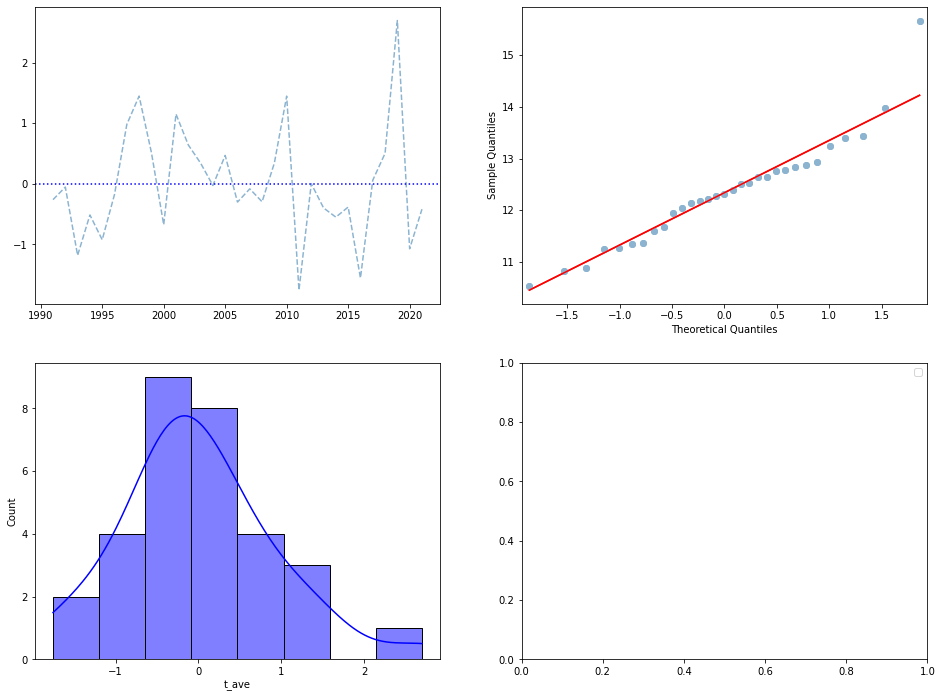

In [103]:
datafarme=df[df['season']=='fa'].resample('A').mean().t_ave
datayear=df[df['season']=='fa'].resample('A').mean().year
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
# plt.grid(True)
plt.figure(figsize=(6,4))
plt.plot(datayear,datafarme,'ro',label='temp')
plt.plot(datayear,y_hat,label='best fit 1d line')
plt.title('average fall temp')
plt.ylabel('temp')
plt.xlabel('Date')
plt.legend(title = "graph",fontsize = 'large', title_fontsize = "10",loc = 2)
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(datafarme-y_hat,kde=True, color ='blue',ax=ax[1,0],label='residual dist histogram')
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1]);
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1])

ax[0,0].plot(datayear,datafarme-y_hat,ls='--',label='residual of first order')
ax[0,0].axhline(0 ,c='b',ls=':')

plt.legend()

C:\Users\Acer\AppData\Local\Temp/ipykernel_2008/2572426566.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datafarme=df[df['season']=='wi'][df['t_min']<0].resample('A').mean().t_ave.dropna()
C:\Users\Acer\AppData\Local\Temp/ipykernel_2008/2572426566.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datayear=df[df['season']=='wi'][df['t_min']<0].resample('A').mean().year.dropna()


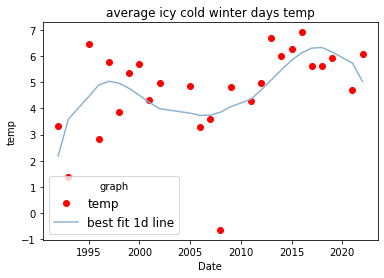

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


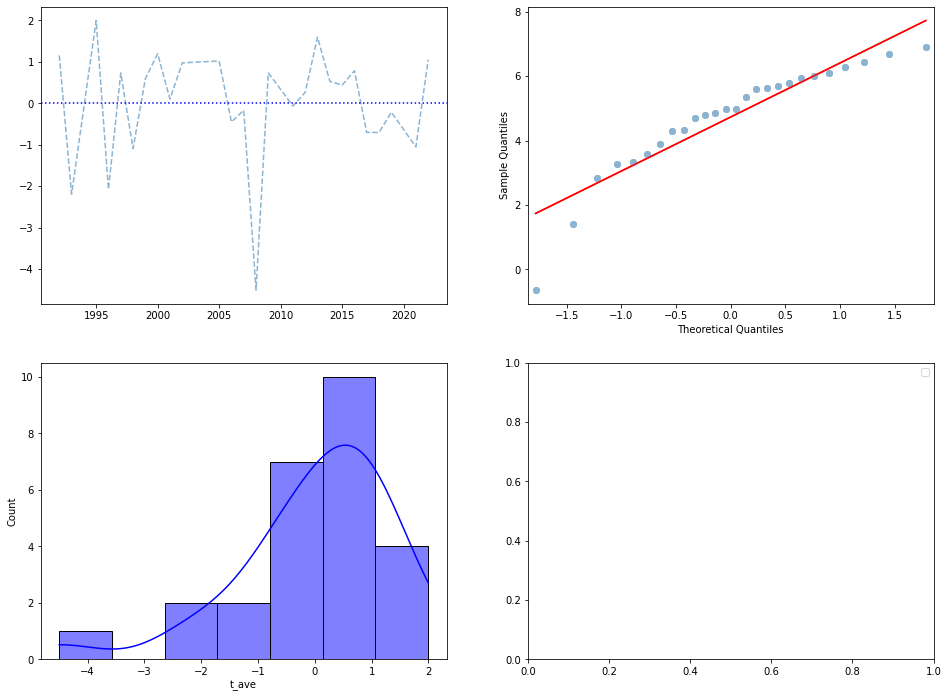

In [104]:
# fo fff cold winters
datafarme=df[df['season']=='wi'][df['t_min']<0].resample('A').mean().t_ave.dropna()
datayear=df[df['season']=='wi'][df['t_min']<0].resample('A').mean().year.dropna()
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 5)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
# plt.grid(True)
plt.figure(figsize=(6,4))
plt.plot(datayear,datafarme,'ro',label='temp')
plt.plot(datayear,y_hat,label='best fit 1d line')
plt.title('average icy cold winter days temp')
plt.ylabel('temp')
plt.xlabel('Date')
plt.legend(title = "graph",fontsize = 'large', title_fontsize = "10",loc = 'lower left',)
plt.show()
# sns.distplot(datafarme)
# datafarme
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(datafarme-y_hat,kde=True, color ='blue',ax=ax[1,0],label='residual dist histogram')
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1]);
sm.ProbPlot(datafarme).qqplot(line='s', ax=ax[0,1])

ax[0,0].plot(datayear,datafarme-y_hat,ls='--',label='residual of first order')
ax[0,0].axhline(0 ,c='b',ls=':')

plt.legend()

eval_env: 1


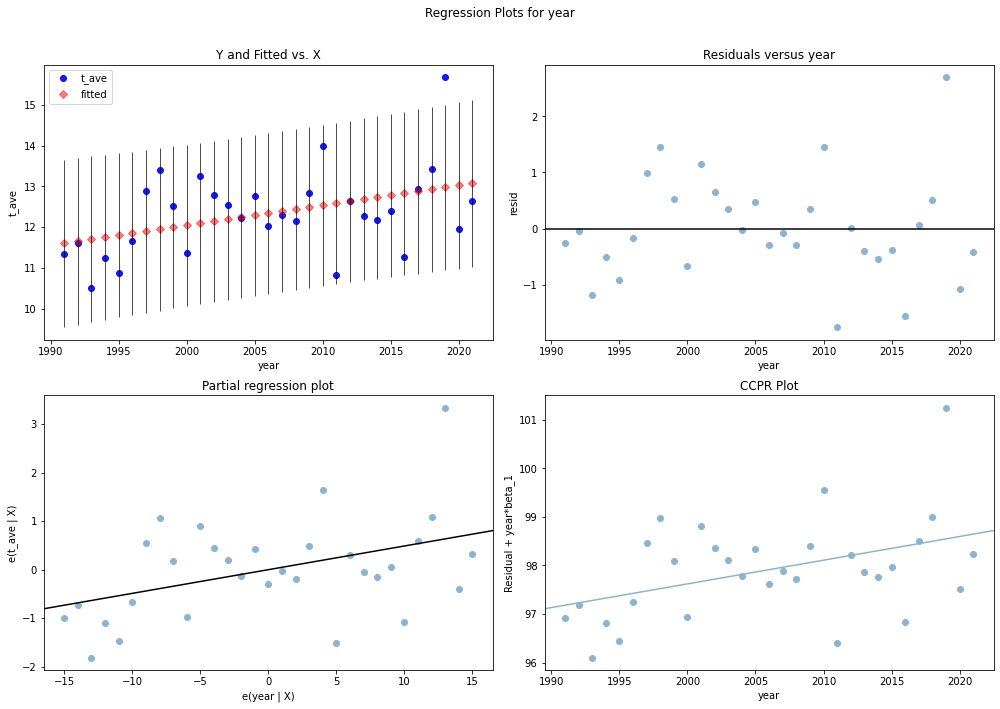

In [83]:
# imports

# import scipy.stats as sc
# import statsmodels.graphics.gofplots as sm
# from statsmodels.formula.api import ols
# # define distributions
# sample_size = 10000
# standard_norm = np.random.normal(size=sample_size)
# heavy_tailed_norm = np.random.normal(loc=0, scale=2, size=sample_size)
# skewed_norm = sc.skewnorm.rvs(a=5, size=sample_size)
# skew_left_norm = sc.skewnorm.rvs(a=-5, size=sample_size)


# # plots for standard distribution
# fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# sns.histplot(standard_norm,kde=True, color ='blue',ax=ax[0])
# sm.ProbPlot(standard_norm).qqplot(line='s', ax=ax[1]);




# 
import statsmodels.api as sm
data=df[df['season']=='fa'].resample('A').mean()
linear_model = ols('t_ave ~ year',
                   data=data).fit()
  
# display model summary
# print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 10))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'year',
                                    fig=fig)


# predictions for next 10 years

## Observation Residual Variance
fitted values


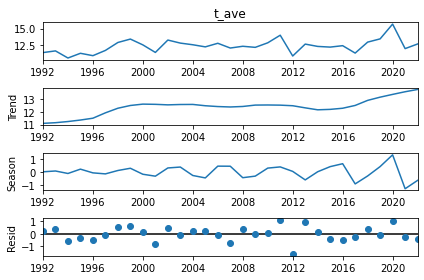

In [293]:
datafarme=df[df['season']=='fa'].resample('A').mean().t_ave
decomp= STL(datafarme,period=4).fit()
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid


decomp.plot();


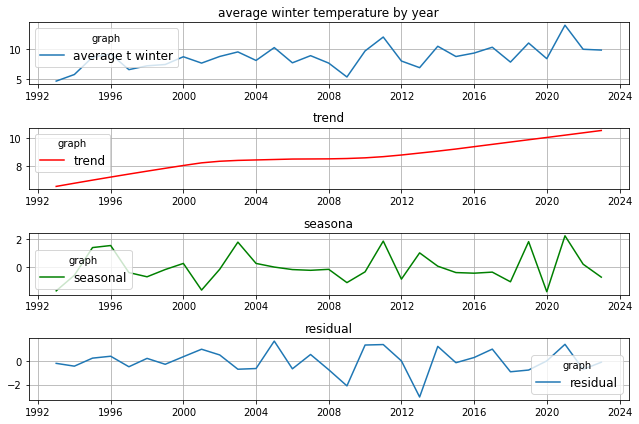

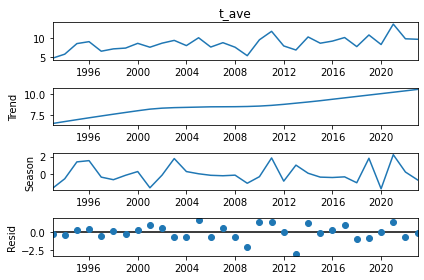

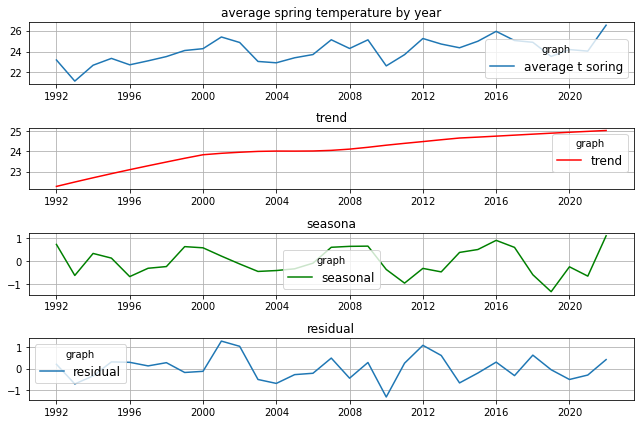

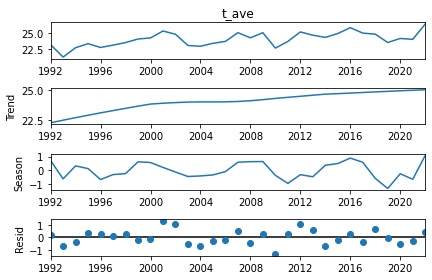

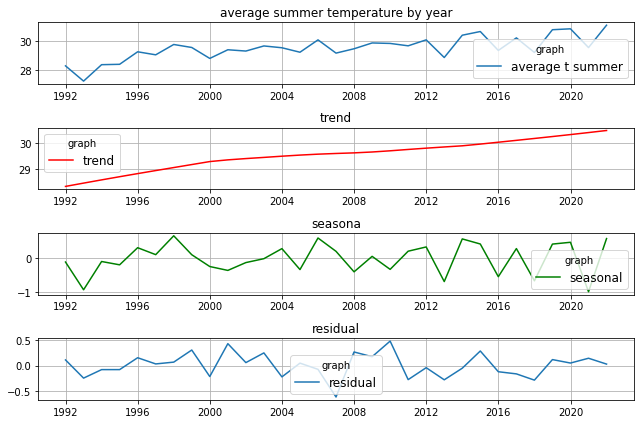

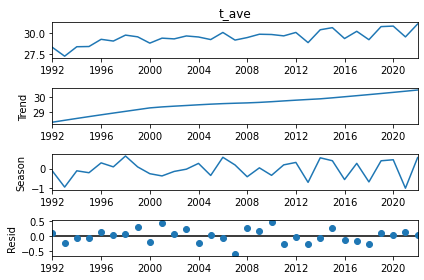

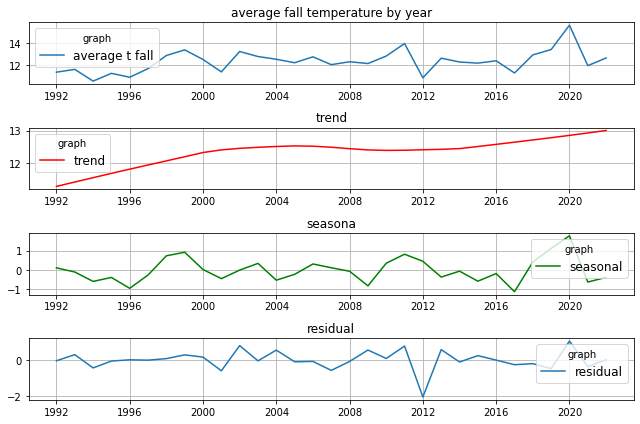

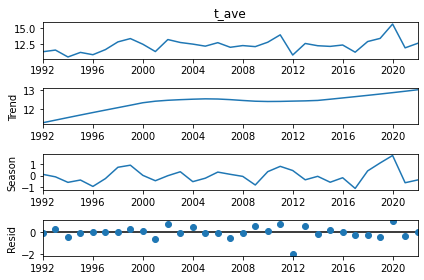

In [213]:
plt.figure(figsize=(9,6))
plt.subplot(4,1,1)

# plt.xlabel('')
plt.plot(datafarme)
plt.title('average fall temperature by year')
plt.grid(True)
# plt.axhline(20,c='coral',ls='--')
plt.legend(labels=["average t fall"],title = "graph",fontsize = 'large', title_fontsize = "10")


plt.subplot(4,1,2)
# plt.figure(figsize=(9,6))
# plt.xlabel('')
plt.plot(trend,c='red')
plt.title('trend')
plt.grid(True)
# plt.axhline(20,c='coral',ls='--')
plt.legend(labels=["trend"],title = "graph",fontsize = 'large', title_fontsize = "10")


plt.subplot(4,1,3)
# plt.figure(figsize=(9,6))
# plt.xlabel('')
plt.plot(seasonal,c='green')
plt.title('seasona')
plt.grid(True)
# plt.axhline(20,c='coral',ls='--')
plt.legend(labels=["seasonal"],title = "graph",fontsize = 'large', title_fontsize = "10")


plt.subplot(4,1,4)
# plt.figure(figsize=(9,6))
# plt.xlabel('')
plt.plot(residual)
plt.title('residual',c='black')
plt.grid(True)
# plt.axhline(20,c='coral',ls='--')
plt.legend(labels=["residual"],title = "graph",fontsize = 'large', title_fontsize = "10")


plt.tight_layout()
plt.show()
decomp.plot();

# forcasting with ARMA ARIMA  SAMIRA HOLT WINTERS 


## SO WE NEED TRANSFORM OUR DATA FOR SOME STATIONARY NEEDED MODELS


# Holt winters model  ''not stationary''
The Holt-Winters method uses exponential smoothing to encode lots of values from the past and use them to predict “typical” values for the present and future. Exponential smoothing refers to the use of an exponentially weighted moving average (EWMA) to “smooth” a time serie

Exponential smoothing methods including Holt-Winters methods are appropriate for (some kinds of) non-stationary data. In fact, they are only really appropriate if the data are non-stationary. Using an exponential smoothing method on stationary data is not wrong but is sub-optimal.

The Holt-Winters forecasting method applies a triple exponential smoothing for level, trend and seasonal components. A Holt-Winters model is defined by its three order parameters, alpha, beta, gamma. Alpha specifies the coefficient for the level smoothing. Beta specifies the coefficient for the trend smoothing.

In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
datafarme=df[df['season']=='wi'].resample('A').mean().t_ave
train=datafarme
test=datafarme['2016':]

holtwinter=ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=8).fit()
predictions=holtwinter.forecast(steps=10)
for i in predictions:
    print(round(i*1.1,2))
print('**********')    
for i in predictions:
    print(round(i*1.13,2),)
print('**********') 
for i in predictions:
    print(round(i*0.95,2))
# holtwinter.summary()


11.3
9.88
11.11
14.24
11.44
13.15
12.18
11.94
12.28
10.73
**********
11.61
10.15
11.41
14.63
11.75
13.51
12.51
12.26
12.61
11.02
**********
9.76
8.53
9.59
12.3
9.88
11.35
10.52
10.31
10.6
9.27


<AxesSubplot:title={'center':'Holt Winter prediction test for winter'}, xlabel='Date'>

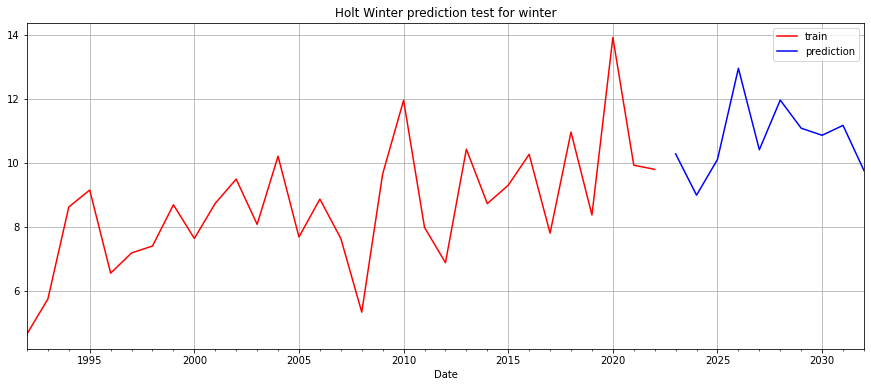

In [125]:
plt.title('Holt Winter prediction test for winter')
train.plot(legend=True , label='train', figsize=(15,6),grid=True,c='r')
# test.plot(legend=True , label='test')
predictions.plot(legend=True , label='prediction',grid=True,c='b')
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(test,predictions)),train.mean(),np.sqrt(train.var())

<AxesSubplot:title={'center':'Holt Winter prediction test for spring'}, xlabel='Date'>

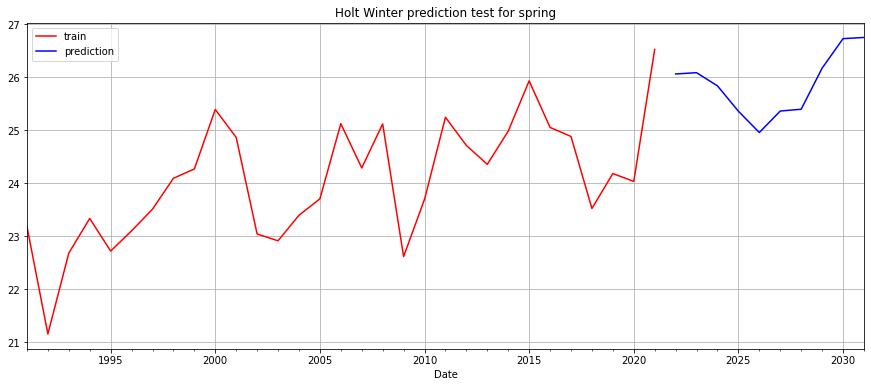

In [128]:
plt.title('Holt Winter prediction test for spring')
train.plot(legend=True , label='train', figsize=(15,6),grid=True,c='r')
# test.plot(legend=True , label='test')
predictions.plot(legend=True , label='prediction',grid=True,c='b')
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(test,predictions)),train.mean(),np.sqrt(train.var())

<AxesSubplot:title={'center':'Holt Winter prediction test for summer'}, xlabel='Date'>

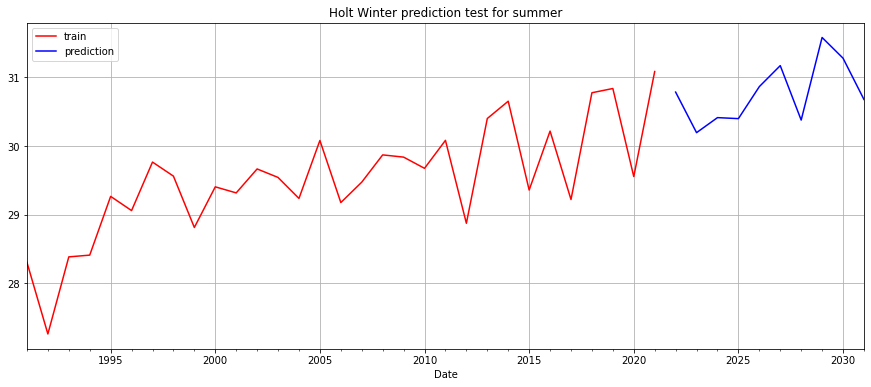

In [130]:
plt.title('Holt Winter prediction test for summer')
train.plot(legend=True , label='train', figsize=(15,6),grid=True,c='r')
# test.plot(legend=True , label='test')
predictions.plot(legend=True , label='prediction',grid=True,c='b')
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(test,predictions)),train.mean(),np.sqrt(train.var())

<AxesSubplot:title={'center':'Holt Winter prediction test for fall'}, xlabel='Date'>

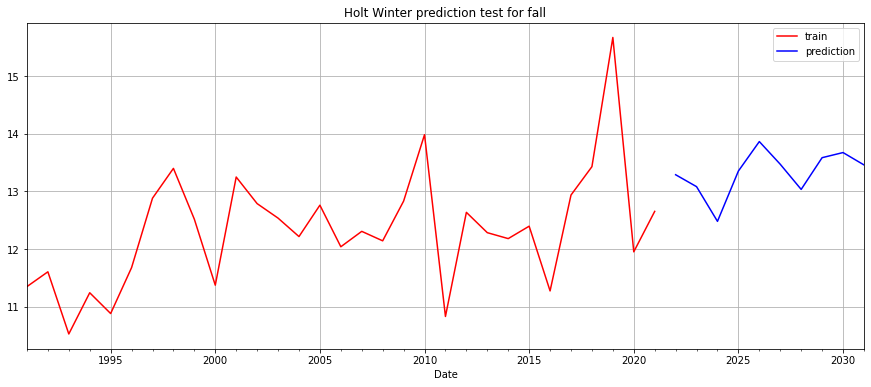

In [134]:
plt.title('Holt Winter prediction test for fall')
train.plot(legend=True , label='train', figsize=(15,6),grid=True,c='r')
# test.plot(legend=True , label='test')
predictions.plot(legend=True , label='prediction',grid=True,c='b')
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(test,predictions)),train.mean(),np.sqrt(train.var())



# Box_Cox

In [22]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='t_ave', ylabel='Density'>

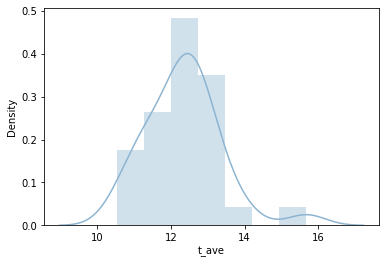

In [23]:
#Aggregate using one or more operations over the specified axis
datafarme=df[df['season']=='fa'].resample('A').mean().t_ave
# df.t_min.agg(['mean', 'median'])
# df.skew(axis=0)
sns.distplot(datafarme)

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:913: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(year     0.000000
 month   -5.567764
 day     -5.567764
 t_min    0.231802
 t_max   -0.006829
 t_ave   -0.016188
 dtype: float64,
 <AxesSubplot:xlabel='t_ave', ylabel='Density'>)

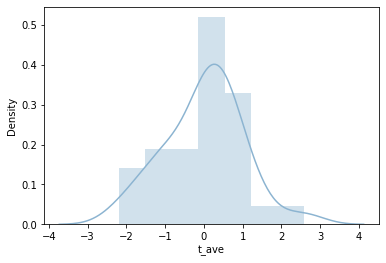

In [27]:
datafarme=df[df['season']=='fa'].resample('A').mean()
skw=datafarme.skew()
skw=skw[abs(skw)>0.75].index


datafarme[skw]=PowerTransformer('box-cox').fit_transform(datafarme[skw])
datafarme.skew(),sns.distplot(datafarme.t_ave)

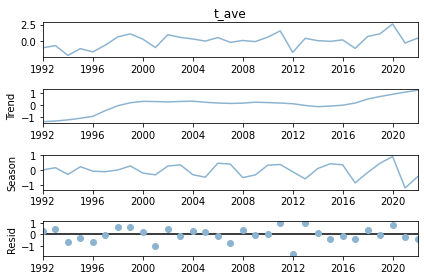

In [28]:
decomp= STL(datafarme.t_ave,period=4).fit()
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid


decomp.plot();


# PACF ACF
## partial auto correlation and auto correlation

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


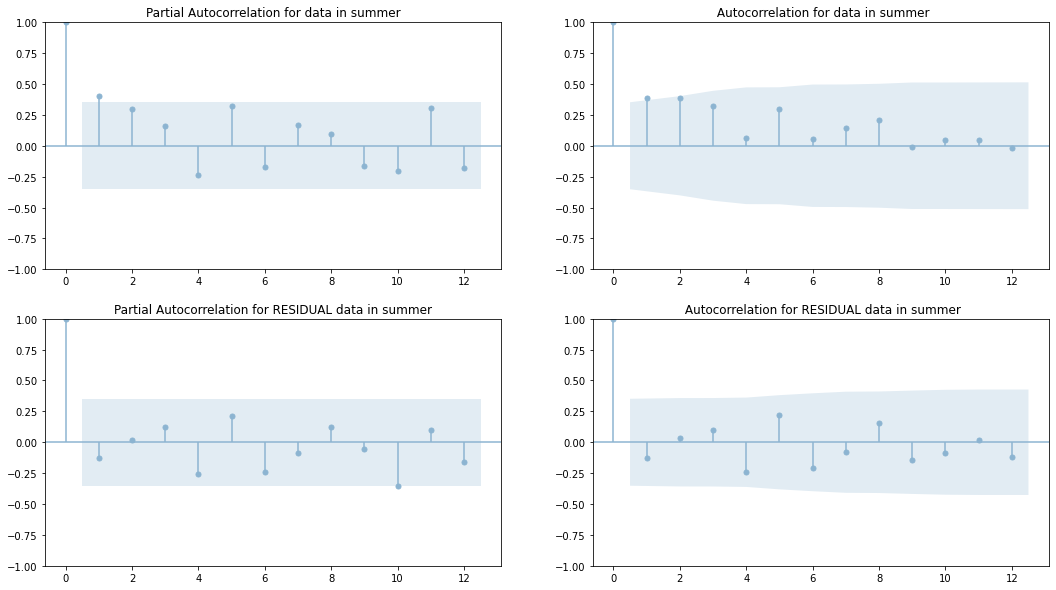

In [167]:
import statsmodels.api as sm
datafarme=df[df['season']=='su'].resample('A').mean().t_ave
datayear=df[df['season']=='su'].resample('A').mean().year
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
fig, ax = plt.subplots(2,2,figsize=(18, 10))
sm.graphics.tsa.plot_pacf( datafarme,lags=12, ax=ax[0,0],title='Partial Autocorrelation for data in summer')
sm.graphics.tsa.plot_acf( datafarme,lags=12, ax=ax[0,1],title=' Autocorrelation for data in summer')
sm.graphics.tsa.plot_pacf( datafarme-y_hat,lags=12, ax=ax[1,0],title='Partial Autocorrelation for RESIDUAL data in summer')
sm.graphics.tsa.plot_acf( datafarme-y_hat,lags=12, ax=ax[1,1],title=' Autocorrelation for RESIDUAL data in summer');

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


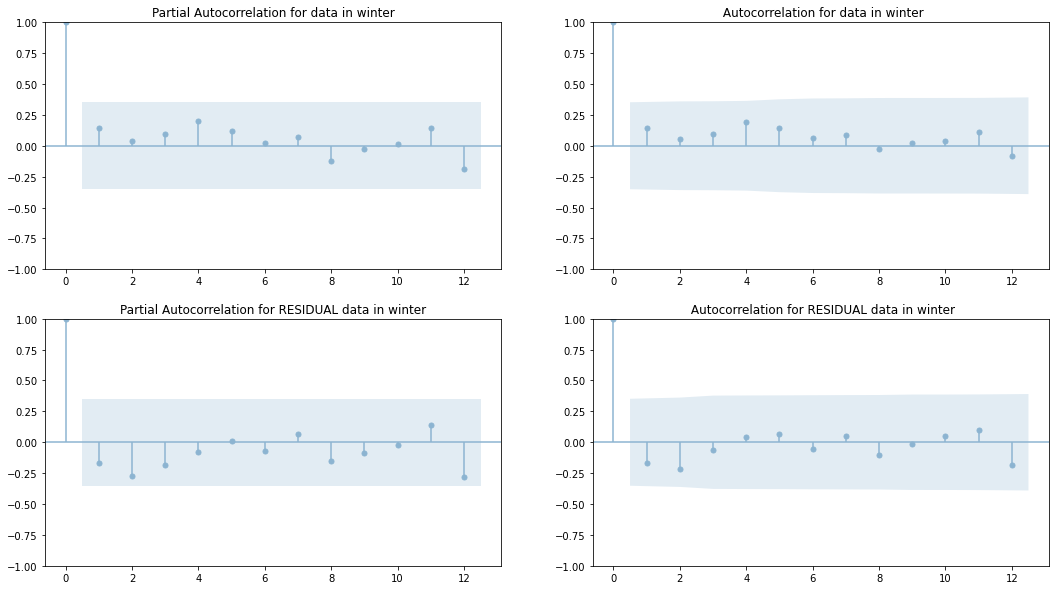

In [175]:
datafarme=df[df['season']=='wi'].resample('A').mean().t_ave
datayear=df[df['season']=='su'].resample('A').mean().year
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
fig, ax = plt.subplots(2,2,figsize=(18, 10))
xx='winter'
sm.graphics.tsa.plot_pacf( datafarme,lags=12, ax=ax[0,0],title='Partial Autocorrelation for data in '+xx)
sm.graphics.tsa.plot_acf( datafarme,lags=12, ax=ax[0,1],title=' Autocorrelation for data in '+xx)
sm.graphics.tsa.plot_pacf( datafarme-y_hat,lags=12, ax=ax[1,0],title='Partial Autocorrelation for RESIDUAL data in '+xx)
sm.graphics.tsa.plot_acf( datafarme-y_hat,lags=12, ax=ax[1,1],title=' Autocorrelation for RESIDUAL data in '+xx);

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


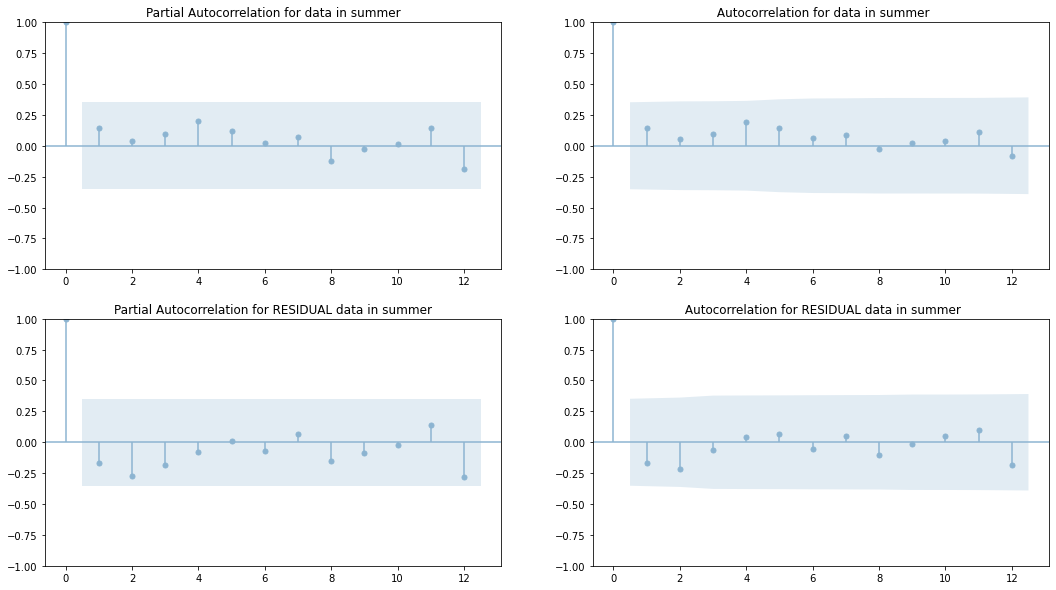

In [170]:
datafarme=df[df['season']=='wi'].resample('A').mean().t_ave
datayear=df[df['season']=='su'].resample('A').mean().year
x_values = np.linspace(0,1,len(datafarme))
coeffs = np.polyfit(x_values,datafarme, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)
fig, ax = plt.subplots(2,2,figsize=(18, 10))
sm.graphics.tsa.plot_pacf( datafarme,lags=12, ax=ax[0,0],title='Partial Autocorrelation for data in summer')
sm.graphics.tsa.plot_acf( datafarme,lags=12, ax=ax[0,1],title=' Autocorrelation for data in summer')
sm.graphics.tsa.plot_pacf( datafarme-y_hat,lags=12, ax=ax[1,0],title='Partial Autocorrelation for RESIDUAL data in summer')
sm.graphics.tsa.plot_acf( datafarme-y_hat,lags=12, ax=ax[1,1],title=' Autocorrelation for RESIDUAL data in summer');

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
my_order = (1,0,0)
my_seasonal_order = (1, 0, 1, 12)
datafarme=df[df['season']=='wi'].resample('A').mean().t_ave.diff()
train=datafarme
test=datafarme['2016':]

# define model
model = SARIMAX(train, order=my_order )
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  t_ave   No. Observations:                   31
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -64.857
Date:                Sun, 28 Aug 2022   AIC                            133.714
Time:                        18:49:09   BIC                            136.581
Sample:                    12-31-1992   HQIC                           134.648
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4602      0.142     -3.233      0.001      -0.739      -0.181
sigma2         4.3840      1.390      3.155      0.002       1.661       7.108
Ljung-Box (L1) (Q):                   1.24   Jarque-

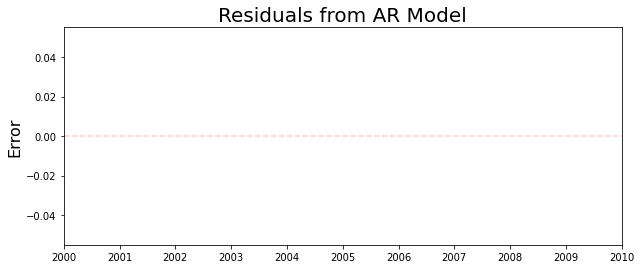

In [76]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test))
predictions = pd.Series(predictions, index=test.index)
residuals = test - predictions
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
# predictions

Text(0, 0.5, 'Sales')

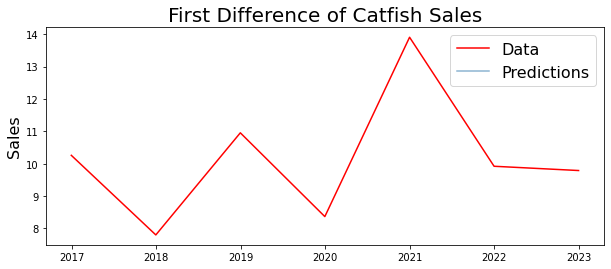

In [187]:
plt.figure(figsize=(10,4))

plt.plot(test,c='r')
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

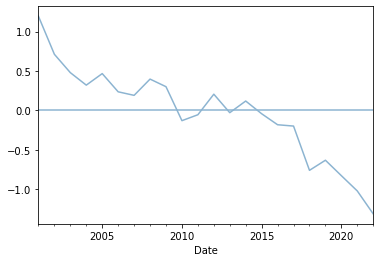

In [45]:
dataframe=df[df['season']=='wi'].resample('A').mean().t_ave
(dataframe.mean()
 -dataframe.rolling(10).mean()).dropna().plot(label='mean versus moving average of 10')
plt.axhline(0)

<AxesSubplot:xlabel='Date'>

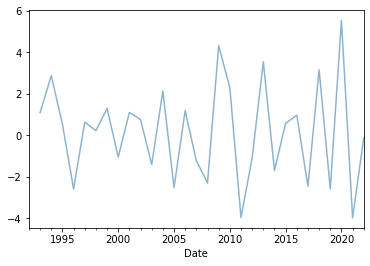

In [57]:
dataframe.diff().plot()

In [51]:

from pmdarima import auto_arima
# ignore harmless warning
import warnings
warnings.filterwarnings('ignore')

In [61]:
stepfit=auto_arima(dataframe.diff().dropna(),trace=True)
stepfit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=140.934, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=135.322, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.090, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=131.966, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=129.871, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=128.665, Time=0.05 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=129.872, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=129.517, Time=0.03 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0] intercept
Total fit time: 1.096 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(4, 0, 0)   Log Likelihood                 -58.333
Date:                Sun, 28 Aug 2022   AIC                            128.665
Time:                        18:30:36   BIC                            137.072
Sample:                    12-31-1993   HQIC                           131.355
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5722      0.422      1.355      0.175      -0.255       1.400
ar.L1         -0.9833      0.349     -2.818      0.005      -1.667      -0.300
ar.L2         -0.9519      0.512     -1.858      0.063      -1.956       0.052
ar.L3         -0.6965      0.380     -1.832      0.067      -1.441       0.049
ar.L4         -0.3588      0.372     -0.965      0.334      -1.087       0.370
sigma2         2.7004      0.737      3.664      0.000       1.256       4.145
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.88   Prob(JB):                         0.81
Heteroskedasticity (H):               1.86   Skew:                             0.19
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
from statsmodels.tsa.arima_model import ARIMA
my_order = (4,0,0)
# my_seasonal_order = (1, 0, 1, 12)
datafarme=df[df['season']=='wi'].resample('A').mean().t_ave
train=datafarme
test=datafarme['2016':]
model = ARIMA(train, order=my_order)